In [ ]:
import pandas as pd
import numpy as np

***OVER_VIEW***

**Heart Stroke is a medical emergency that can lead todeath pf a person.There can be a no of factors lead to heart stroke.To under stand about same,i have taken a live dataset from Kaggle which contained the data of5110 human beings with 11 variable factors.The variables which considered in the analysis were AGE,HYPERTENSION,HEART DISEASE,EVER MARRIED,WORK TYPE,RESIDENSE,AVERAGE GLUCOSE LEVEL,BMI AND SMOKING STATUS.the data was recived in a CSV format.For completing the taskthe various libraries used were pandas,numpy,matplotlib,seaborn etc..**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [ ]:
import io
df=pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.shape

(5110, 12)

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Q_1:dessission on what need to be done with NULLvalue of BMI.in case your are removing NULL values_Why?**

In [ ]:
df["bmi"].value_counts()

In [ ]:
df["bmi"].fillna(df["bmi"].mean(),inplace=True)

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df[df["bmi"].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


**Q_3:How many person get stroke based on worktype?**

In [ ]:
a=df[df.stroke==1].work_type.value_counts()

In [ ]:
a

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

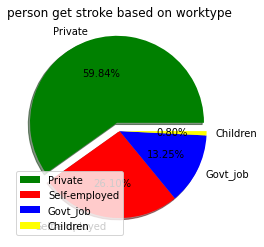

In [ ]:
plt.pie(a,colors=["green","red","blue","yellow"],labels=["Private","Self-employed","Govt_job","Children"],autopct="%0.2f%%",
        shadow=True,explode=(0.1,0,0,0))
plt.title("person get stroke based on worktype")
plt.legend(loc="lower left")
plt.show()


**private workers are more chance to getting stroke compared with other types of workers**

**Q_4:Gender wise_What is the ratio of marriage people getting stroke?**

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
t=df[df["stroke"]==1]
t.groupby(["gender","ever_married"])["stroke"].sum()


gender  ever_married
Female  No               21
        Yes             120
Male    No                8
        Yes             100
Name: stroke, dtype: int64

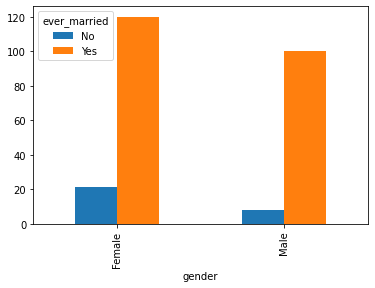

In [ ]:
t.groupby("gender").ever_married.value_counts().unstack().plot.bar()

**married females have more chance to getting stroke when compared to males**

**Q_5:Which age group getting high stroke?**

In [ ]:
a1=df[(df["stroke"]==1)&(df["age"]>0)&(df["age"]<20)].value_counts()
a1.value_counts()

1    2
dtype: int64

In [ ]:
a2=df[(df["stroke"]==1)&(df["age"]>20)&df["age"]<40].value_counts()
a2.value_counts()

1    5110
dtype: int64

In [ ]:
a3=df[(df["stroke"]==1)&(df["age"]>40)&(df["age"]<60)].value_counts()
a3.value_counts()

1    60
dtype: int64

In [ ]:
a4=df[(df["stroke"]==1)&(df["age"]>60)&(df["age"]<80)].value_counts()
a4.value_counts()

1    137
dtype: int64

In [ ]:
a5=df[(df["stroke"]==1)&(df["age"]>80)].value_counts()
a5.value_counts()

1    23
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df["age"].nunique()

104

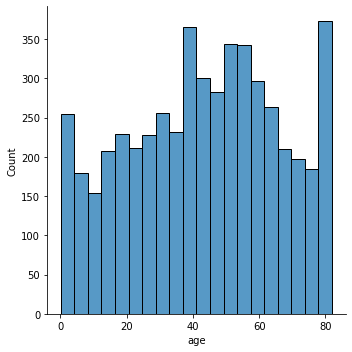

In [ ]:
sns.displot(df["age"])

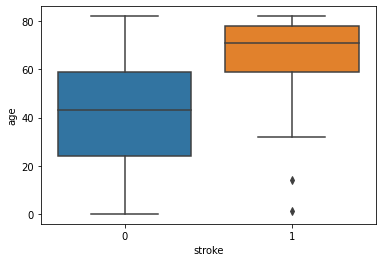

In [ ]:
sns.boxplot(data=df,x="stroke",y="age")

**so we conclude that 20 to 60 age groupe has getting high stroke**

**Q_6:How many married?not married male person doing smoking**

In [ ]:
pd.crosstab(df["ever_married"],df["smoking_status"],margins=True).style.background_gradient(cmap="summer_r")

smoking_status,Unknown,formerly smoked,never smoked,smokes,All
ever_married,,,,,
No,901,147,530,179,1757
Yes,643,738,1362,610,3353
All,1544,885,1892,789,5110


**Q_7:How many people b/w age group40 to 60 with hypertension are getting stroke?**

In [ ]:
t=df[(df["hypertension"]==1)&(df["age"]<60)&(df["age"]>40)].stroke.value_counts()

In [ ]:
t

0    148
1     12
Name: stroke, dtype: int64

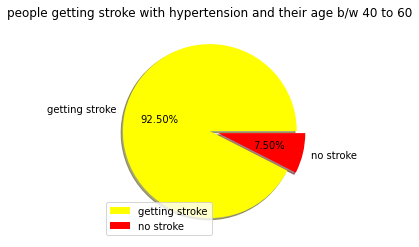

In [ ]:
plt.pie(t,colors=["yellow","red"],labels=["getting stroke","no stroke"],autopct="%0.2f%%",
        shadow=True,explode=(0,0.1))
plt.title("people getting stroke with hypertension and their age b/w 40 to 60")
plt.legend(loc="lower left")
plt.show()

**Q_8:what is the percentage ofUrban/Rural people getting stroke?**

In [ ]:
t=df[(df["stroke"]==1)].Residence_type.value_counts()
t

Urban    135
Rural    114
Name: Residence_type, dtype: int64

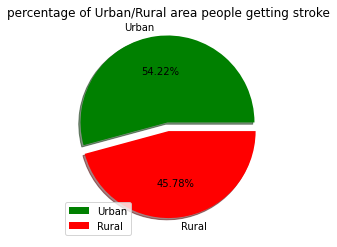

In [ ]:
plt.pie(t,colors=["green","red"],labels=["Urban","Rural"],autopct="%0.2f%%",
        shadow=True,explode=(0.1,0))
plt.title("percentage of Urban/Rural area people getting stroke")
plt.legend(loc="lower left")
plt.show()

**Q_9:What is the average glucose level of non smoking male?**

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


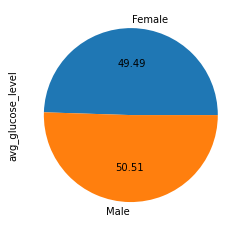

In [ ]:
t=df[(df["smoking_status"]=="never smoked")]
t.groupby("gender")["avg_glucose_level"].mean().plot(kind="pie",autopct="%0.2f")

**Q_10:how many teenager getting stroke?what is the reason(urban area/smoking/bmi/glucose level.)**

In [ ]:
teen_age=df[(df['stroke']==1)&(df["age"]>12)&(df["age"]<20)].value_counts()

In [ ]:
teen_age

id     gender  age   hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi   smoking_status  stroke
49669  Female  14.0  0             0              No            children   Rural           57.93              30.9  Unknown         1         1
dtype: int64

**After my analysis teenagers are more safe in the case of stroke**

****

**Q_11:what is the relations b/w BMI and stroke?**

In [ ]:
x=df["bmi"]
y=df["stroke"]

In [ ]:
cov=(sum((x-np.mean(x))*(y-np.mean(y))))/len(x)

In [ ]:
cov

0.06454275644518871

In [ ]:
cor=cov/(np.std(x)*np.std(y))
cor

0.03894659651201563

In [ ]:
cr=df.corr()
cr

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [ ]:
abs(cr["bmi"]).sort_values(ascending=True)

id                   0.002999
heart_disease        0.038899
stroke               0.038947
hypertension         0.160189
avg_glucose_level    0.168751
age                  0.325942
bmi                  1.000000
Name: bmi, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

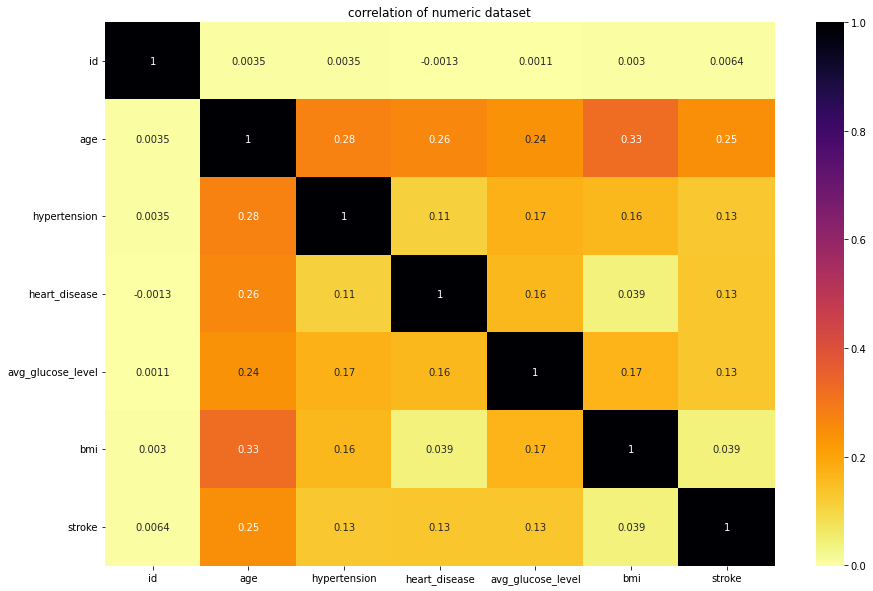

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cr,annot=True,cmap="inferno_r")
plt.title("correlation of numeric dataset")
plt.show()

**Q_12:what is the persentage of people having heart desease getting stroke/not stroke?**

In [ ]:
print("value counts\n",(df["heart_disease"]==1).value_counts())

value counts
 False    4834
True      276
Name: heart_disease, dtype: int64


In [ ]:
df[(df.stroke==1)&(df.heart_disease==1)].value_counts()

In [ ]:
t=df[df.heart_disease==1].stroke.value_counts()
t

0    229
1     47
Name: stroke, dtype: int64

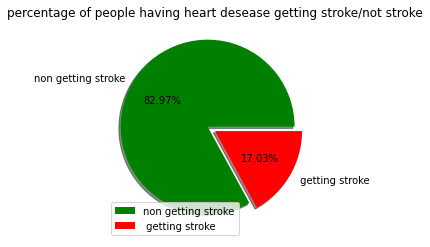

In [ ]:
plt.pie(t,colors=["green","red"],labels=["non getting stroke"," getting stroke"],autopct="%0.2f%%",
        shadow=True,explode=(0.1,0))
plt.title("percentage of people having heart desease getting stroke/not stroke")
plt.legend(loc="lower left")
plt.show()

**82.97% people having heart desease not getting stroke and 17.03% people having heart desease getting stroke**

> Indented block



**Q_13:what is the ratio of hypertension with gender wise and worktype wise**

In [ ]:
hp=df[df["hypertension"]==1]
hp.groupby(["gender","work_type"])["hypertension"].sum()

gender  work_type    
Female  Govt_job          43
        Private          155
        Self-employed     78
Male    Govt_job          30
        Private          126
        Self-employed     66
Name: hypertension, dtype: int64

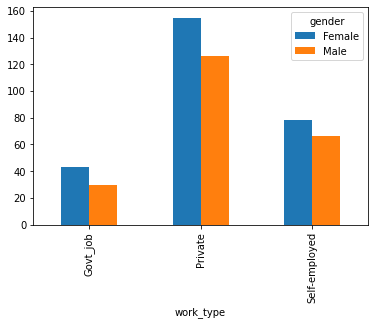

In [ ]:
hp.groupby("work_type").gender.value_counts().unstack().plot.bar()

****

**female having private job has more chance to getting hypertension**

**Q_14:which gender has got high risk of getting stroke?**

In [ ]:
a=df[df["stroke"]==1].gender.value_counts()
a

Female    141
Male      108
Name: gender, dtype: int64

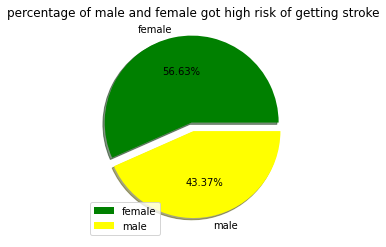

In [ ]:
plt.pie(a,colors=["green","yellow"],labels=["female","male"],autopct="%.2f%%",
        shadow=True,explode=(.1,0))
plt.title("percentage of male and female got high risk of getting stroke")
plt.legend(loc="lower left")
plt.show()

**females has got high risk of getting stroke**

**Q_15:Mke a catogory of glucose level of high / low and Average with different age group(teenager,Adult,**Elder**) **

In [ ]:
df

In [ ]:
age_group=[]
for i in range(df.shape[0]):
  if df["age"][i]<=10:
    age_group.append("child")
  elif df["age"][i]>10 and df["age"][i]<=20:
    age_group.append("teenager")
  elif df["age"][i]>20 and df["age"][i]<=40:
    age_group.append("adult")
  elif df["age"][i]>40:
    age_group.append("elder")



In [ ]:
len(age_group)

5110

In [ ]:
df.shape[0]

5110

In [ ]:
df["age_group"]=age_group
df

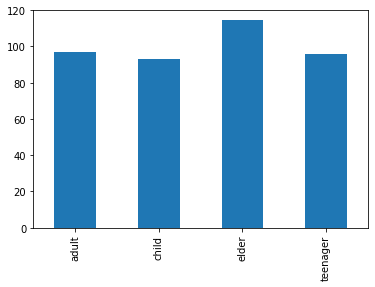

In [ ]:
df.groupby(age_group)["avg_glucose_level"].mean().plot.bar()